# Building Neuron Tensors
Resources that have been useful:
* [key resource] Stanford tutorial: https://cs231n.github.io/convolutional-networks/
* [key resource] Stackexchange that makes all this clear with a simple example: https://stackoverflow.com/questions/52272592/how-many-neurons-does-the-cnn-input-layer-have
----
* https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/
* https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/
* https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks
* https://hackernoon.com/learning-keras-by-implementing-vgg16-from-scratch-d036733f2d5

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.layers import InputLayer, Input
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.python.keras import backend as K
import math

* load a pre-trained network (VGG16)
* input images from CIFAR-10 to VGG16
* choose some random unit in one of the layers and plot its activity for different images

## Load VGG16 model

In [2]:
from keras.applications.vgg16 import VGG16
model = VGG16(include_top=False, weights='imagenet',input_shape=(32,32,3))
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [3]:
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)
model = Model(inputs=model.inputs, outputs=output)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

## Load CIFAR-10 Data

In [5]:
from tensorflow.python.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data() #load dataset into ~/.keras/datasets/

#printout shapes of train and test data
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [6]:
N_train = 50000
N_test = 10000
img_shape = (32, 32, 3) #use a tuple in the fomat: (height, width, n_channels)
n_classes = 9
print(N_train,N_test,img_shape,n_classes)

50000 10000 (32, 32, 3) 9


In [7]:
## normalize the images 
x_train.dtype ##int from 0 to 255
x_train = x_train / 255.0
x_train.dtype

dtype('float64')

In [8]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
idx = (y_train == 3).reshape(x_train.shape[0])
images_cat = x_train[idx]
images_cat[0]

array([[[0.49019608, 0.49019608, 0.45490196],
        [0.43137255, 0.39607843, 0.35686275],
        [0.4       , 0.35294118, 0.3254902 ],
        ...,
        [0.79215686, 0.81176471, 0.83921569],
        [0.78431373, 0.80392157, 0.83137255],
        [0.79215686, 0.81568627, 0.83921569]],

       [[0.55686275, 0.57254902, 0.55686275],
        [0.57254902, 0.56470588, 0.54509804],
        [0.69019608, 0.6745098 , 0.66666667],
        ...,
        [0.76470588, 0.78823529, 0.80392157],
        [0.77647059, 0.80392157, 0.81960784],
        [0.8       , 0.82745098, 0.84313725]],

       [[0.70588235, 0.7254902 , 0.71764706],
        [0.56078431, 0.57254902, 0.57254902],
        [0.61176471, 0.61568627, 0.61568627],
        ...,
        [0.47843137, 0.43529412, 0.44313725],
        [0.54509804, 0.50196078, 0.51372549],
        [0.61960784, 0.57647059, 0.58823529]],

       ...,

       [[0.40784314, 0.32156863, 0.16078431],
        [0.39607843, 0.31372549, 0.15294118],
        [0.39607843, 0

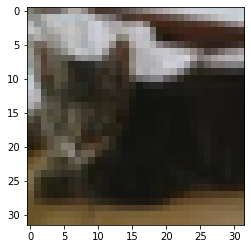

In [10]:
plt.imshow(images_cat[0])

(32, 32)


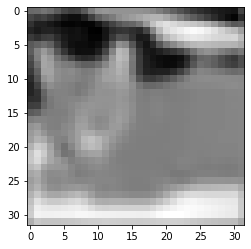

In [11]:
im = images_cat[0]
im.shape
layer = model.layers[1] 
output_layer = K.function(inputs=[layer.input], 
                      outputs=[layer.output])
out = output_layer(np.array([im]))[0] 
out_feature_map_5 = out[0,:,:,5]
plt.imshow(out_feature_map_5, cmap='gray')
print(out_feature_map_5.shape)

In [12]:
images_cat = images_cat[0:3]

### Define function for general layer/neuron/image index: 

outputSize_W = (W−F+2P)/S+1

outputSize_H = (H−F+2P)/S+1

W = width = 32, H = height = 32, F = filter size = 3, P = padding = 1, S = stride = 1

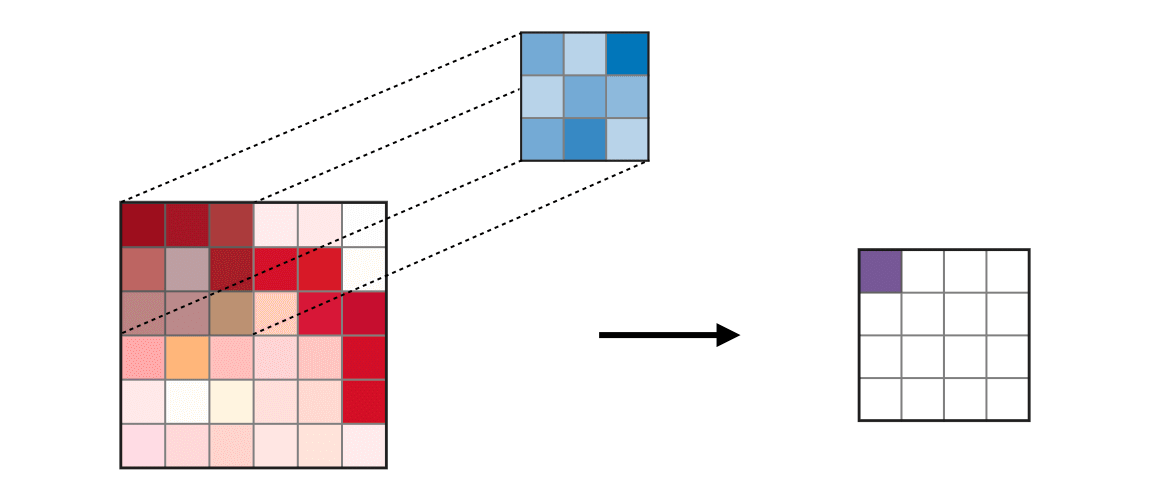

### Applying shifts:
* shift_step = 3, which is the filter size
* shift the images such that each filter eventually capture all pixels

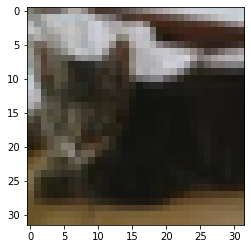

In [13]:
im1 = images_cat[0]
plt.imshow(im1)

In [14]:
def apply_all_shifts(im, shift_step):
    '''
    arg(s): 
        im, an image of shape (im_size, im_size, 3)
    return: 
        im_all_shifts, a list of all shifted images from the input image
        n_shifts, number of shifted images
    '''
    
    ## vertical size might not be the same as the horizontal
    im_size_vertical = im.shape[0]
    im_size_horizontal = im.shape[1]
    
    n_shifts_vertical = int(math.ceil(im_size_vertical/ shift_step))
    n_shifts_horizontal = int(math.ceil(im_size_horizontal/ shift_step))
    
    im_all_shifts = []
    im_shift = im
    for i in range(n_shifts_vertical):
        im_shift = np.roll(im_shift, shift = shift_step * i, axis=0)
        
        for j in range(n_shifts_horizontal):
            im_shift = np.roll(im_shift, shift = shift_step * j, axis=1)
            im_all_shifts.append(im_shift)
            
    im_all_shifts =  np.array(im_all_shifts)
    return im_all_shifts, n_shifts_vertical * n_shifts_horizontal

Text(0.5, 0.98, 'Visualizing Some Shifts (shift_step = 2)')

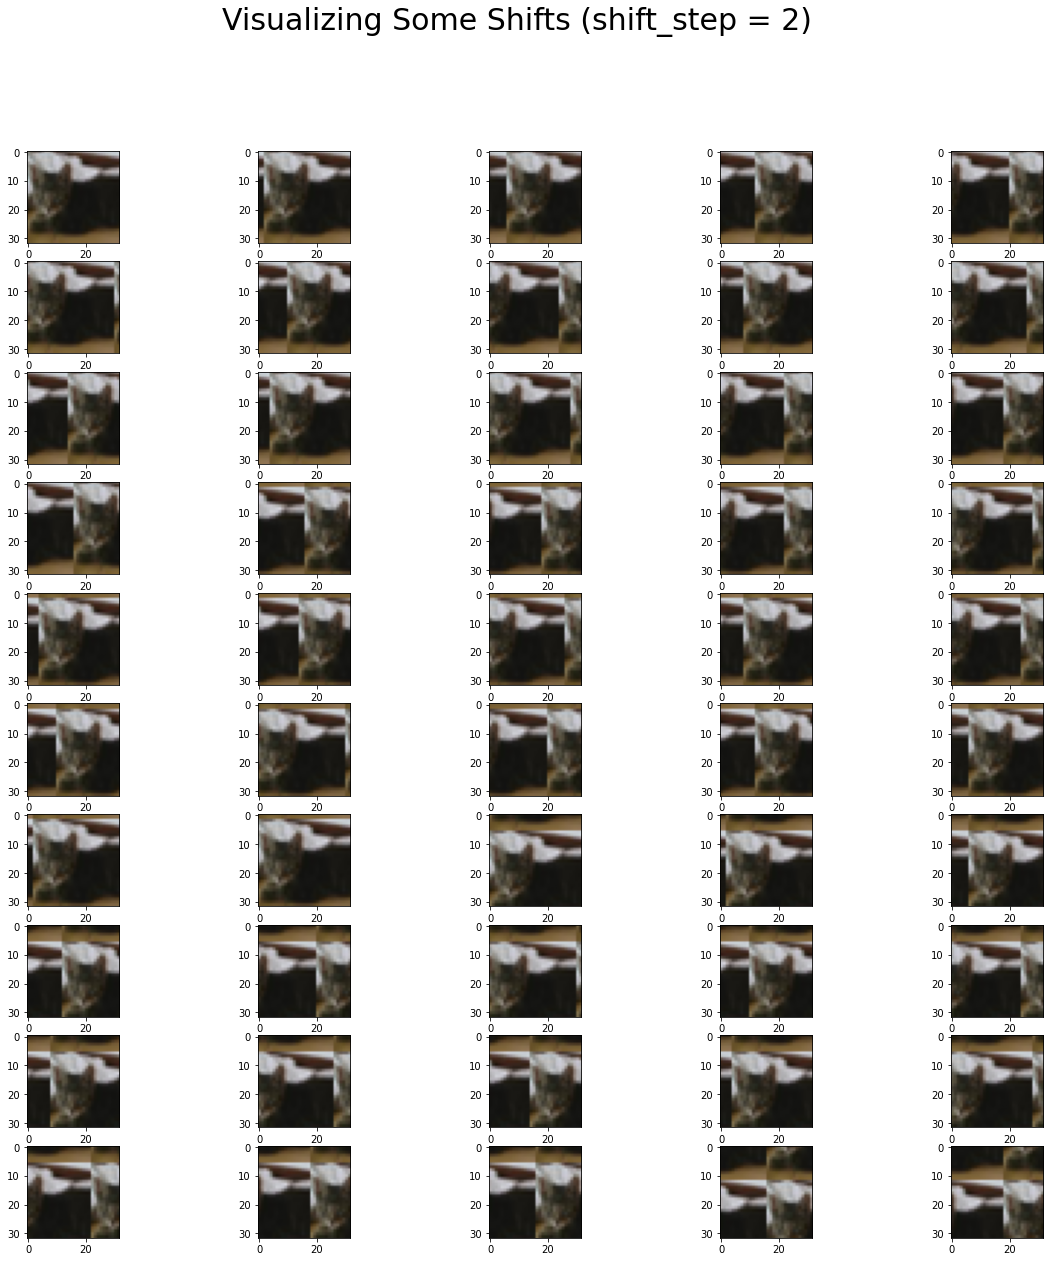

In [15]:
## check the shifted images
im1 = images_cat[0]
im_all_shifts, n_shifts = apply_all_shifts(im1,2)
# nrow = int(n_shifts/5)

fig, axs = plt.subplots(10, 5, figsize =  (20,20))
for i , ax in enumerate(axs.flatten()):
    ax.imshow(im_all_shifts[i])
fig.suptitle('Visualizing Some Shifts (shift_step = 2)', fontsize=30)


### Function to compute neuron output (neuron dimension):
#### For each layer in the neural network, choose one feature map with the highest average firing rate:

In [16]:
def compute_neuron_output(layer_indices, images, plot_activity = False):

    '''
    arg(s):
        layer_indices: list of the indices of the layers we want to take neuron outputs from
        images: an array of images (stimuli)
    return:
        
    '''
    n_layers = len(layer_indices)
    neuron_output_highest = []
    all_fm_avg = []
    neuron_labels = []
    
    for layer_index in layer_indices:
        layer = model.layers[layer_index] 
        
        # check for convolutional layer
        if 'conv' not in layer.name:
            continue
        
        ## note: always take the images as inputs
        output_layer = K.function(inputs=[model.layers[1].input], 
                              outputs=[layer.output])
        
        ## output is n feature maps
        neuron_output = output_layer(images)[0]
   
        ## number of neurons is nrow * ncol * n_feature_maps
        n_images, n_row, n_col, n_feature_maps = neuron_output.shape[:]
        neuron_output = neuron_output.reshape((n_images, n_row * n_col, n_feature_maps))
        
        neuron_labels += [layer_index] * n_row * n_col
        
        ## transpose to organize by feature maps
        ## neuron_output_by_fm is (n_images, n_feature_maps, #neurons)
        neuron_output_by_fm = np.transpose(neuron_output, (0, 2, 1)) 
        
        ## compute avg neuron firing rate in each feature map
        ## fm_avg is (n_images, n_feature_maps)
        fm_avg = neuron_output_by_fm.sum(axis=2) / neuron_output_by_fm.shape[2]
        
        if layer_index == 1:
            fm_avg_all_layers = fm_avg
        else:
            fm_avg_all_layers = np.hstack((fm_avg_all_layers, fm_avg))
        
        max_fm_ind = np.argmax(fm_avg,axis = 1)
        
        
        if plot_activity == True:
            print("Current layer: " + layer.name)
            print("Indices of FM with highest average firing rate in response to each image: " )
            print(max_fm_ind)
            print("#neurons in the FM with highest average firing rate: " + str(n_row * n_col))
            print("Average activity for all feature maps in " + layer.name)
            plt.matshow(fm_avg)
            plt.show()
            print('----------------------------------------------------\n')
        
        temp = neuron_output_by_fm[0,max_fm_ind[0],:].reshape(1, n_row * n_col)
        for i in range(1,n_images):
            temp = np.vstack((temp, neuron_output_by_fm[i,max_fm_ind[i],:].reshape(1, n_row * n_col)))
        if(layer_index == 1): 
            neuron_output_highest = temp
        else:
            neuron_output_highest = np.hstack((neuron_output_highest, temp))
    
    neuron_labels = np.array(neuron_labels)     
    return neuron_output_highest, fm_avg_all_layers, neuron_labels 

#### Among all feature maps in the specified layers, choose the top ten feature maps with the highest average firing rate:

In [17]:
 def compute_neuron_output_alt(layer_indices, images, plot_activity = False):

    '''
    arg(s):
        layer_indices: list of the indices of the layers we want to take neuron outputs from
        images: an array of images (stimuli)
    return:
        
    '''
    n_layers = len(layer_indices)
    neuron_output_highest = []
    all_fm_avg = []
    neuron_labels = []
    
    for layer_index in layer_indices:
        layer = model.layers[layer_index] 
        
        # check for convolutional layer
        if 'conv' not in layer.name:
            continue
        
        ## note: always take the images as inputs
        output_layer = K.function(inputs=[model.layers[1].input], 
                              outputs=[layer.output])
        
        ## output is n feature maps
        neuron_output = output_layer(images)[0]
   
        ## number of neurons is nrow * ncol * n_feature_maps
        n_images, n_row, n_col, n_feature_maps = neuron_output.shape[:]
        n_neurons = n_row * n_col
        neuron_output = neuron_output.reshape((n_images, n_neurons, n_feature_maps))
    
        
        ## transpose to organize by feature maps
        ## neuron_output_by_fm is (n_images, n_feature_maps, #neurons)
        neuron_output_by_fm = np.transpose(neuron_output, (0, 2, 1)) 
        
        ## compute avg neuron firing rate in each feature map
        ## fm_avg is (n_images, n_feature_maps)
        fm_avg = neuron_output_by_fm.sum(axis=2) / neuron_output_by_fm.shape[2]
        
        if layer_index == 1:
            fm_avg_all_layers = fm_avg
            neuron_output_by_fm_all_layers = neuron_output_by_fm
        else:
            fm_avg_all_layers = np.hstack((fm_avg_all_layers, fm_avg))
            neuron_output_by_fm_all_layers = np.concatenate((neuron_output_by_fm_all_layers,neuron_output_by_fm), axis = 1)

    neuron_output_highest = np.empty((n_images,n_neurons *10))
    for i in range(n_images):
        max10_indices = np.argpartition(fm_avg_all_layers[i], -10, axis = 0)[-10:]
        neuron_output_highest[i] = neuron_output_by_fm_all_layers[i, max10_indices, :].reshape((1,n_neurons *10))
    
    for i in range(10):    
        neuron_labels += [i] * n_neurons
        
    neuron_labels = np.array(neuron_labels)     
    return neuron_output_highest, fm_avg_all_layers, neuron_labels 

### Function to get images (stimuli dimension):

In [20]:
def show_stimuli(layer_indices, n_images_per_class, image_classes, shifts, plot_activity = False):
    '''
    arg(s): 
        layer_indices
        n_images_per_class
        image_classes
        shifts = True/False
    return:
        neuron_output_shifts_avg, (n_images, n_neurons)
    '''
    # select images from specified classes:
    
    n_classes = len(image_classes)
    n_images = n_classes * n_images_per_class
    
    for i in range(n_classes):
        idx = (y_train == image_classes[i]).reshape(x_train.shape[0])
        images = x_train[idx]
        ## images has shape (5000, 32, 32, 3), take the first n_images_per_class images from each selected class:
        images = images[0:n_images_per_class,:,:,:]
        if i == 0:
            images_selected_classes = images
        else:
            images_selected_classes = np.vstack((images_selected_classes, images))
    
    images_selected_classes = np.array(images_selected_classes)
    
    if shifts is False:
        neuron_output_highest, fm_avg_all_layers, neuron_labels = compute_neuron_output_alt(layer_indices, images_selected_classes, plot_activity = plot_activity)
    
    else:
        # generate shifts for each selected image: 
        neuron_output_highest_with_shifts = []
        fm_avg_all_layers_with_shifts = []
        for i in range(n_images):
            im = images_selected_classes[i]
            im_all_shifts, n_shifts =  apply_all_shifts(im, 1)

            ## neuron_output_highest is of shape (number of shifts, neurons)
            neuron_output_highest, fm_avg_all_layers, neuron_labels = compute_neuron_output_alt(layer_indices, im_all_shifts, plot_activity = False)
            
            ## instead of taking average, we create another dim
            neuron_output_highest_with_shifts.append(neuron_output_highest)
            
            fm_shifts_avg = fm_avg_all_layers.sum(axis=0) / fm_avg_all_layers.shape[0]
            fm_shifts_avg = fm_shifts_avg.reshape((1,fm_shifts_avg.shape[0]))
            
            if i == 0:
                fm_avg_all_layers_with_shifts = fm_shifts_avg
            else:
                fm_avg_all_layers_with_shifts = np.vstack((fm_avg_all_layers_with_shifts, fm_shifts_avg))
                
        neuron_output_highest = np.array(neuron_output_highest_with_shifts)
        fm_avg_all_layers = fm_avg_all_layers_with_shifts
 
    return neuron_output_highest, fm_avg_all_layers, neuron_labels

In [21]:
neuron_output_highest_with_shifts, fm_avg_all_layers_with_shifts, neuron_labels= show_stimuli(layer_indices = range(3), n_images_per_class = 10, image_classes = [3,1,0,5], shifts = True)

In [22]:
neuron_output_highest_with_shifts.shape

(40, 1024, 10240)

In [23]:
fm_avg_all_layers_with_shifts.shape

(40, 128)

In [24]:
neuron_labels

array([0, 0, 0, ..., 9, 9, 9])

## Get embedding from TCA

In [24]:
import tensortools as tt

In [25]:
data = np.transpose(neuron_output_highest_with_shifts, (2, 0, 1)) 

In [27]:
data.shape

(10240, 40, 1024)

In [26]:
from scipy.io import savemat
mdic = {"neuron_output_3D": data}
mdic

{'neuron_output_3D': array([[[ 1.68111479,  1.87478602,  1.96956813, ...,  1.45572817,
           0.69144833,  0.19604692],
         [ 1.69425499,  1.75173032,  1.89514148, ...,  1.93597829,
           1.86102402,  1.909742  ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 2.44022775,  2.19239163,  2.89198828, ...,  3.33839202,
           2.82228899,  3.00680017],
         [ 0.56562245,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.66114938],
         [ 2.94958162,  2.85037899,  4.12500334, ...,  2.36340475,
           4.71057415,  4.74218321]],
 
        [[ 2.70542192,  3.06908989,  3.36433697, ...,  1.72963178,
           0.20996293,  0.        ],
         [ 2.78158617,  2.62418127,  2.84070158, ...,  2.96348286,
           2.90509367,  2.95029306],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 3.

In [28]:
savemat("neuron_output_3D.mat", mdic)

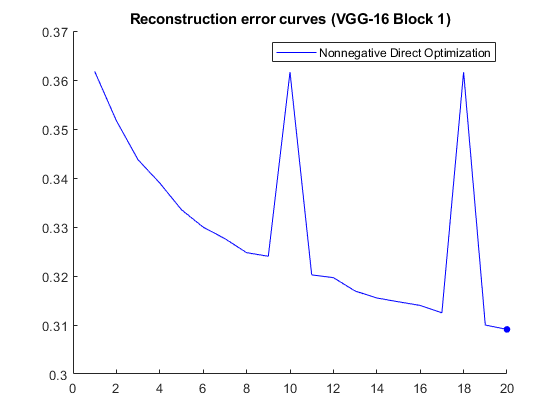

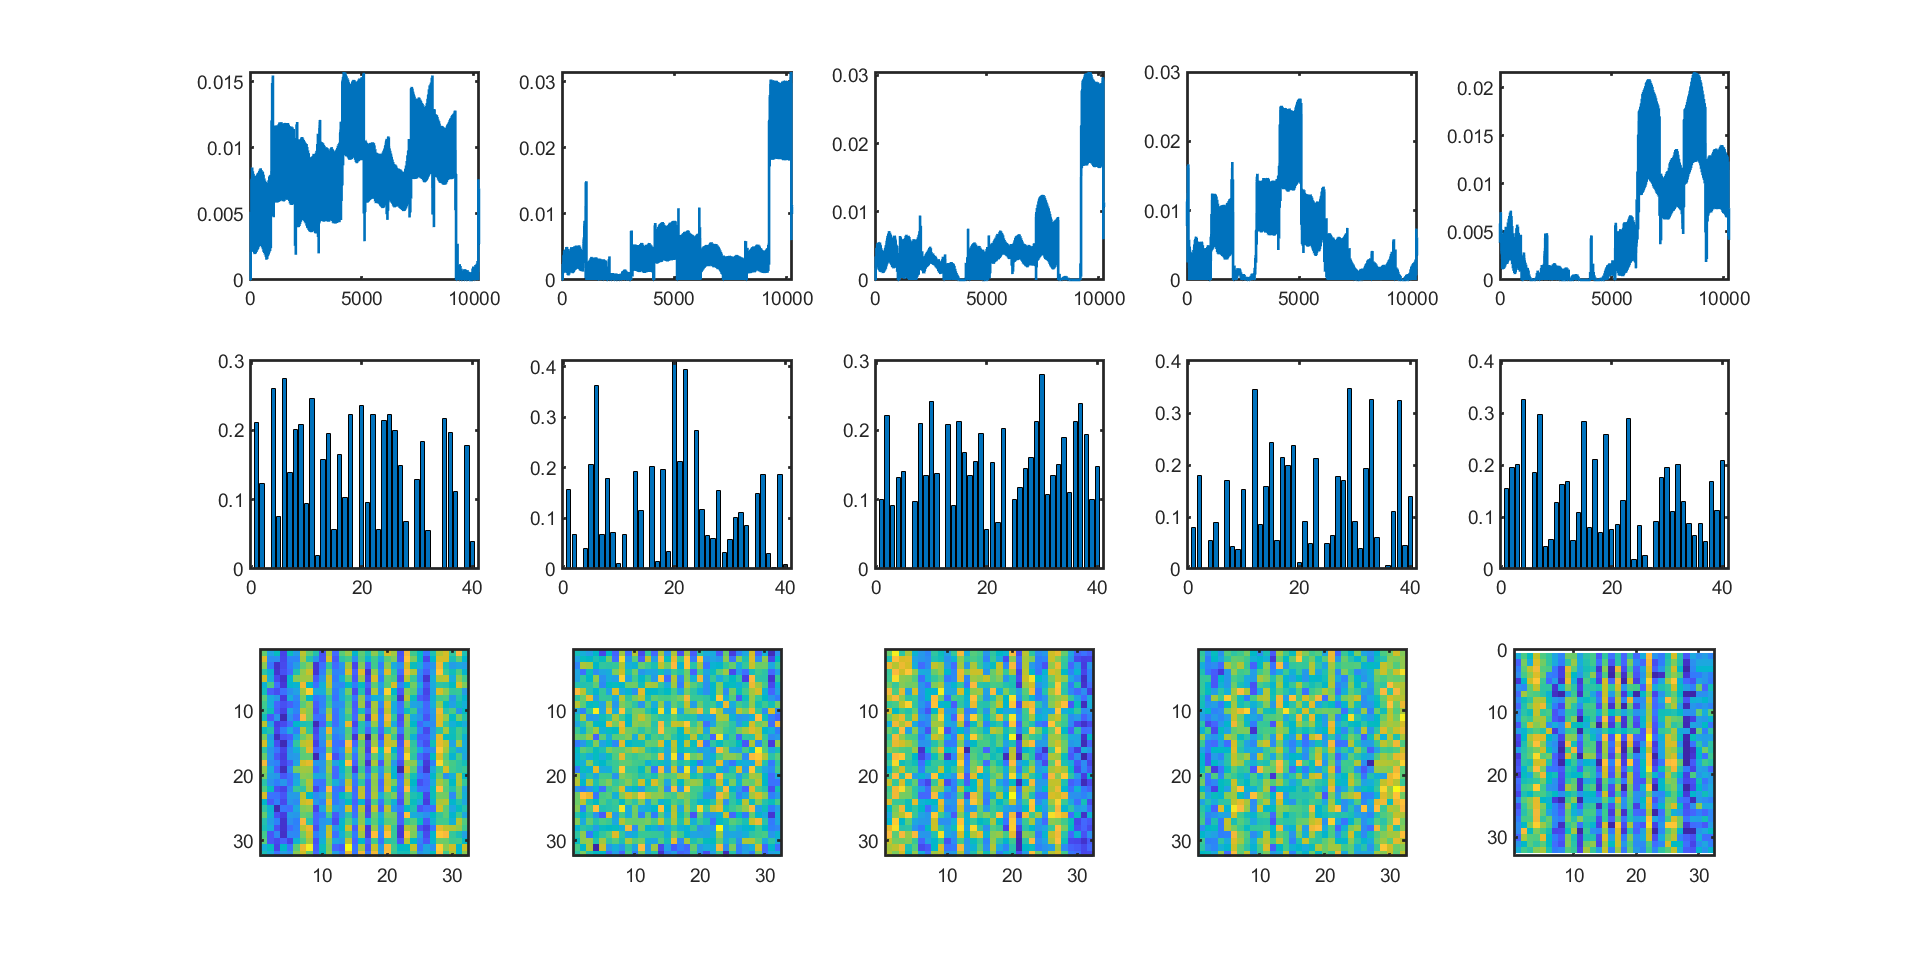

In [46]:
from scipy.io import loadmat 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
F = loadmat('factors_opt_nonneg_3D.mat')['F']

In [47]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=20, init='random', random_state=0, max_iter = 5000)
neuron_output_highest_with_shifts_projected = nmf.fit_transform(F)
neuron_output_highest_with_shifts_projected.shape

(10240, 20)

In [48]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()
traces = []
colors_palette = px.colors.qualitative.Dark24
data = neuron_output_highest_with_shifts_projected 

for i, label in enumerate(set(neuron_labels)):
    mask = (neuron_labels == label)
    print(label, sum(mask))
    traces.append(go.Scatter3d(
        x=data[mask,0],
        y=data[mask,1],
        z=data[mask,2],
        mode='markers',
        marker=dict(
            size=4,
            color=colors_palette[i],
            opacity=1,

            #showscale= True,
        )))

for trace in traces:
    fig.add_trace(trace)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),showlegend=True,)
fig.show()


0 1024
1 1024
2 1024
3 1024
4 1024
5 1024
6 1024
7 1024
8 1024
9 1024


In [35]:
kmeans = KMeans(init="random", n_clusters=10, n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
clusters = kmeans.labels_

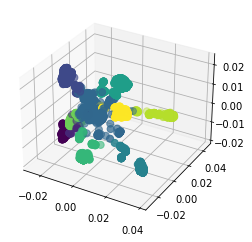

In [36]:
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:,1], X[:,2], c=clusters, s=50, cmap='viridis')